#import drive & libereris

In [1]:
from google.colab import drive
drive.mount ('/content/drive')
!mkdir -p '/content/drive/MyDrive/Dl_chp4_pro2'

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#data prepration

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [22]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [23]:
#
x = np.concatenate((x_train,x_test),axis=0)/255  #normalize and adjust dtpe
y = np.concatenate((y_train,y_test),axis=0)
x.shape , y.shape

((60000, 32, 32, 3), (60000, 1))

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,shuffle=True, random_state=40)
x_train.shape,x_test.shape,y_train.shape, x_train.dtype

((51000, 32, 32, 3), (9000, 32, 32, 3), (51000, 1), dtype('float64'))

# build and train  vonv2d model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(50,5,activation='relu', padding='SAME',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100,3,activation='relu',padding='same'),
    #keras.layers.MaxPooling2D(2),
    #keras.layers.Conv2D(200,3,activation='relu',padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # defult adam lr= 0.001

In [ ]:
import time
start_time= time.time()

checkpoint_path_1 = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_modelchekpoint.keras"

conv2d_callbacks = [ #keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_1,  monitor='accuracy', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]

history_con2d = model.fit(x_train,y_train, epochs=50,validation_split=0.15,callbacks=[conv2d_callbacks])
end_time = time.time()
print(f"Total training time for 10 epochs :   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = model.evaluate(x_train,y_train)
print(f"accuracy for 10 epochs  is :   {accuracy}  . ",end='\n')

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 212s 155ms/step - accuracy: 0.2388 - loss: 2.0278 - val_accuracy: 0.4651 - val_loss: 1.4657
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 257s 152ms/step - accuracy: 0.4398 - loss: 1.5449 - val_accuracy: 0.5323 - val_loss: 1.2997
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 204s 151ms/step - accuracy: 0.5064 - loss: 1.3824 - val_accuracy: 0.5688 - val_loss: 1.2030
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 205s 151ms/step - accuracy: 0.5515 - loss: 1.2643 - val_accuracy: 0.6041 - val_loss: 1.1132
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 262s 151ms/step - accuracy: 0.5840 - loss: 1.1876 - val_accuracy: 0.6110 - val_loss: 1.0849
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 261s 151ms/step - accuracy: 0.6156 - loss: 1.1015 - val_accuracy: 0.6263 - val_loss: 1.0477
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 264s 152ms/step - accuracy: 0.6287 - loss: 1.0478 - val_accuracy: 0.6306 - val_loss: 1.0427
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 260s 151ms/step - ac

In [ ]:
# test set accuraccy
loss_test,accuracy_test = model.evaluate(x_test,y_test)
print(f"accuracy_test after 50  training epochs  is :   {accuracy_test}  . ",end='\n')

282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.6538 - loss: 1.8343
accuracy_test after 50  training epochs  is :   0.6549999713897705  . 


In [ ]:
# save model & history

model_path= "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_model.keras"
model.save(model_path)

import pickle
#  path for save the pickle file
pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_model_history.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(history_con2d.history, pickle_file)

In [19]:
keras.models.load_model("/content/drive/MyDrive/Folder_ch3_exe3/nadam_modelchekpoint.keras")

<Sequential name=sequential, built=True>

In [ ]:
# the best  dense model of previuse chapter
checkpoint_path_nadam = "/content/drive/MyDrive/Folder_ch3_exe3/nadam_modelchekpoint.keras"
best_Dense_model= keras.models.load_model(checkpoint_path_nadam)
best_Dense_model.evaluate(X_test_n,y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5004 - loss: 1.4489


[1.4671634435653687, 0.49149999022483826]

# lr schedule

## exp Lr

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(50,5,activation='relu', padding='SAME',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100,3,activation='relu',padding='same'),
    #keras.layers.MaxPooling2D(2),
    #keras.layers.Conv2D(200,3,activation='relu',padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
# Exp_lr for Optimizer
#exp_lr = keras.optimizers.schedules.ExponentialDecay(decay_rate=0.1,decay_steps=10000, initial_learning_rate=0.01)
#opt = keras.optimizers.Adam(learning_rate=exp_lr)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# lr_callback
def exp_lr_func (mo0, s):
  def exp_lr(epoch):
    return mo0*0.1**(epoch/s)
  return exp_lr


exp_lr_callback = keras.callbacks.LearningRateScheduler(schedule= exp_lr_func(0.004,10))

In [ ]:

import time
start_time= time.time()

checkpoint_path_exp_lr = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_explr_modelchekpoint.keras"

conv2d_checkpoint_exp_lr = [#keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_exp_lr,  monitor='accuracy', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]

history_con2d_explr = model.fit(x_train,y_train, epochs=50,validation_split=0.15,callbacks=[conv2d_checkpoint_exp_lr,exp_lr_callback])
end_time = time.time()
print(f"Total training time  :   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = model.evaluate(x_train,y_train)
print(f"train_set accuracy   is :   {accuracy}  . ",end='\n')

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 192s 140ms/step - accuracy: 0.1973 - loss: 2.1089 - val_accuracy: 0.3429 - val_loss: 1.7037 - learning_rate: 0.0040
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 198s 138ms/step - accuracy: 0.3416 - loss: 1.7653 - val_accuracy: 0.3939 - val_loss: 1.5986 - learning_rate: 0.0032
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 202s 138ms/step - accuracy: 0.3830 - loss: 1.6749 - val_accuracy: 0.4182 - val_loss: 1.5486 - learning_rate: 0.0025
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 187s 138ms/step - accuracy: 0.4168 - loss: 1.5845 - val_accuracy: 0.4205 - val_loss: 1.6404 - learning_rate: 0.0020
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 203s 139ms/step - accuracy: 0.4385 - loss: 1.5410 - val_accuracy: 0.4733 - val_loss: 1.4471 - learning_rate: 0.0016
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 204s 140ms/step - accuracy: 0.4666 - loss: 1.4774 - val_accuracy: 0.4698 - val_loss: 1.4354 - learning_rate: 0.0013
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 189s 139ms

In [25]:
# test set evaluation
checkpoint_path_exp_lr = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_explr_modelchekpoint.keras"
model = keras.models.load_model(checkpoint_path_exp_lr)
model.evaluate(x_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.5257 - loss: 1.3315


[1.312929391860962, 0.534333348274231]

## 1cycle Lr

In [ ]:
# one_cycle_callback_class
class One_cycle_lr(keras.callbacks.Callback):
    def __init__(self, iterations, max_lr, init_lr=None,
                 final_steps=None, final_lr=None):
        super(One_cycle_lr, self).__init__()
        self.iterations = iterations
        self.max_lr = max_lr
        self.init_lr = init_lr or max_lr / 10
        self.final_steps = final_steps or int(iterations / 10) + 1
        self.half_iterations = int((iterations - self.final_steps) / 2)
        self.final_lr = final_lr or self.init_lr / 100
        self.iteration = 0

        # Ensure we have enough iterations
        if iterations < 10:
            raise ValueError("Iterations must be at least 10.")

    def interpolation(self, start, end, total, step):
        return start + (end - start) * (step / total)

    def on_epoch_end(self, epoch, logs=None):
        if self.iteration < self.half_iterations:
            # Increase phase
            lr = self.interpolation(self.init_lr, self.max_lr, self.half_iterations, self.iteration)
        elif self.iteration < 2*self.half_iterations  :
            # Decrease phase
            lr = self.interpolation(self.max_lr, self.init_lr, 2*self.half_iterations, self.iteration)

        else:
            lr = self.final_lr



        #keras.backend.set_value(self.model.optimizer.learning_rate, lr)
         # Update the optimizer's learning rate directly
        self.model.optimizer.learning_rate.assign(lr)  # Use assign instead of set_value


        iteration_per_epocks = int(x_train.shape[0]/batch_size)
        self.iteration += iteration_per_epocks
        print(f'\nIteration {self.iteration}: Learning rate is {lr:.6e} or  {lr:.6f}')


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(50,5,activation='relu', padding='SAME',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100,3,activation='relu',padding='same'),
    #keras.layers.MaxPooling2D(2),
    #keras.layers.Conv2D(200,3,activation='relu',padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# build one_cycle callback
epochs = 50
batch_size = 32
iters = int(x_train.shape[0]/batch_size)*epochs
one_cycle_lr_callback = One_cycle_lr(iters, max_lr=0.005)


In [ ]:
import time
start_time= time.time()

checkpoint_path_1cycle_lr = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_1cyclelr_modelchekpoint.keras"

conv2d_checkpoint_1cycle_lr = [#keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_1cycle_lr,  monitor='accuracy', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]

history_con2d_1cycle = model.fit(x_train,y_train, epochs=epochs,validation_split=0.15,callbacks=[conv2d_checkpoint_1cycle_lr,one_cycle_lr_callback])
end_time = time.time()
print(f"Total training time  :   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = model.evaluate(x_train,y_train)
print(f"train_set accuracy   is :   {accuracy}  . ",end='\n')

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.2337 - loss: 2.0427
Iteration 1593: Learning rate is 5.000000e-04 or  0.000500
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 192s 141ms/step - accuracy: 0.2338 - loss: 2.0426 - val_accuracy: 0.4503 - val_loss: 1.4930
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4273 - loss: 1.5654
Iteration 3186: Learning rate is 7.000028e-04 or  0.000700
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 205s 143ms/step - accuracy: 0.4273 - loss: 1.5654 - val_accuracy: 0.5183 - val_loss: 1.3410
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4700 - loss: 1.4623
Iteration 4779: Learning rate is 9.000056e-04 or  0.000900
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 198s 140ms/step - accuracy: 0.4700 - loss: 1.4623 - val_accuracy: 0.5586 - val_loss: 1.2615
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5065 - loss: 1.3776
Iteration 6372: Learning rate is 1.100008e-03 or  0.001100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 201s

In [ ]:
# test set accuraccy
loss_test,accuracy_test = model.evaluate(x_test,y_test)
print(f"accuracy_test after 50  training epochs  is :   {accuracy_test}  . ",end='\n')

282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6538 - loss: 2.0489
accuracy_test after 50  training epochs  is :   0.6546666622161865  . 


In [ ]:
# save model & history

model_path= "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_1cycle_model.keras"
model.save(model_path)

import pickle
#  path for save the pickle file
pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_1cycle_model_history.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(history_con2d_1cycle.history, pickle_file)

#pooling layer

##model without pooling layer

In [ ]:
# first model without pooling layer , and constant lr
model = keras.models.Sequential([
    keras.layers.Conv2D(50,5,activation='relu', padding='SAME',input_shape=(32,32,3)),
   # keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100,3,activation='relu',padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # defult adam lr= 0.001

In [ ]:
import time
start_time= time.time()

checkpoint_path_2 = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_modelchekpoint_nopool.keras"

conv2d_callbacks_nopool = [ #keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_2,  monitor='accuracy', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]

history_con2d_nopool = model.fit(x_train,y_train, epochs=50,validation_split=0.15,callbacks=[conv2d_callbacks_nopool])
end_time = time.time()
print(f"Total training time for 50 epochs :   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = model.evaluate(x_train,y_train)
print(f"accuracy for 50 epochs  is :   {accuracy}  . ",end='\n')

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 679s 500ms/step - accuracy: 0.2309 - loss: 2.0594 - val_accuracy: 0.4477 - val_loss: 1.5250
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 658s 486ms/step - accuracy: 0.4053 - loss: 1.6316 - val_accuracy: 0.4833 - val_loss: 1.4211
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 697s 497ms/step - accuracy: 0.4615 - loss: 1.4897 - val_accuracy: 0.5157 - val_loss: 1.3574
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 655s 484ms/step - accuracy: 0.4954 - loss: 1.3925 - val_accuracy: 0.5367 - val_loss: 1.2878
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 678s 481ms/step - accuracy: 0.5253 - loss: 1.3051 - val_accuracy: 0.5567 - val_loss: 1.2455
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 673s 497ms/step - accuracy: 0.5595 - loss: 1.2244 - val_accuracy: 0.5901 - val_loss: 1.1779
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 680s 502ms/step - accuracy: 0.5900 - loss: 1.1419 - val_accuracy: 0.6005 - val_loss: 1.1534
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 660s 486ms/step - ac

In [ ]:
# save model & history

model_path= "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_nopool_model.keras"
model.save(model_path)

import pickle
#  path for save the pickle file
pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_nopool_model_history.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(history_con2d_nopool.history, pickle_file)

In [26]:
# load no pool model by 23 trining epocks and evaluate
checkpoint_path_2 = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_modelchekpoint_nopool.keras"
model_nopool = keras.models.load_model(checkpoint_path_2)
model_nopool.evaluate(x_train, y_train)
model_nopool.evaluate(x_test, y_test)

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 195s 122ms/step - accuracy: 0.9247 - loss: 0.2397
282/282 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - accuracy: 0.5897 - loss: 1.9096


[1.8450738191604614, 0.593666672706604]

##pooling , stride=4

In [ ]:
# first model whit pooling _stride4 , and constant lr
model = keras.models.Sequential([
    keras.layers.Conv2D(50,5,activation='relu', padding='SAME',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(strides=4),
    keras.layers.Conv2D(100,3,activation='relu',padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # defult adam lr= 0.001

In [ ]:
import time
start_time= time.time()

checkpoint_path_3 = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_modelchekpoint_strid4.keras"

conv2d_callbacks_strid4 = [ #keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_3,  monitor='accuracy', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]

history_con2d_strid4 = model.fit(x_train,y_train, epochs=50,validation_split=0.15,callbacks=[conv2d_callbacks_strid4])
end_time = time.time()
print(f"Total training time for 50 epochs :   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = model.evaluate(x_train,y_train)
print(f"accuracy for 10 epochs  is :   {accuracy}  . ",end='\n')

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 101s 72ms/step - accuracy: 0.2471 - loss: 2.0057 - val_accuracy: 0.4621 - val_loss: 1.4586
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 140s 71ms/step - accuracy: 0.4475 - loss: 1.5264 - val_accuracy: 0.5258 - val_loss: 1.3111
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 143s 71ms/step - accuracy: 0.5119 - loss: 1.3604 - val_accuracy: 0.5659 - val_loss: 1.2207
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/step - accuracy: 0.5557 - loss: 1.2504 - val_accuracy: 0.5940 - val_loss: 1.1692
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.5900 - loss: 1.1655 - val_accuracy: 0.6111 - val_loss: 1.1157
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 140s 72ms/step - accuracy: 0.6186 - loss: 1.0901 - val_accuracy: 0.6256 - val_loss: 1.0682
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 143s 72ms/step - accuracy: 0.6476 - loss: 1.0161 - val_accuracy: 0.6272 - val_loss: 1.0725
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0

In [ ]:
# test set accuraccy
loss_test,accuracy_test = model.evaluate(x_test,y_test)
print(f"accuracy_test after 50  training epochs  is :   {accuracy_test}  . ",end='\n')

282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6607 - loss: 1.7814
accuracy_test after 50  training epochs  is :   0.6672222018241882  . 


In [ ]:
# save model & history

model_path= "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_strid4_model.keras"
model.save(model_path)

import pickle
#  path for save the pickle file
pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_strid4_model_history.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(history_con2d_strid4.history, pickle_file)

In [ ]:
history

{'accuracy': [0.33035755157470703,
  0.46371394395828247,
  0.5198154449462891,
  0.5631141662597656,
  0.5927566289901733,
  0.6182237863540649,
  0.6423298716545105,
  0.6567704677581787,
  0.675363302230835,
  0.6920876502990723,
  0.7037831544876099,
  0.720461368560791,
  0.7266897559165955,
  0.7353171706199646,
  0.7480968832969666,
  0.75206458568573,
  0.7651441693305969,
  0.7678200602531433,
  0.7742791175842285,
  0.7813610434532166,
  0.7874509692192078,
  0.7912110686302185,
  0.7982468008995056,
  0.805144190788269,
  0.8060899376869202,
  0.8084198236465454,
  0.8146482110023499,
  0.8194463849067688,
  0.8224682807922363,
  0.8254440426826477,
  0.8287428021430969,
  0.8292041420936584,
  0.8352249264717102,
  0.8361937999725342,
  0.8407381772994995,
  0.8435755372047424,
  0.8471972346305847,
  0.844406008720398,
  0.8516493439674377,
  0.8458592891693115,
  0.8525951504707336,
  0.8541176319122314,
  0.8566781878471375,
  0.8605305552482605,
  0.8608534932136536,
  

## Comparison gragh (for pooling with diffrent strides)

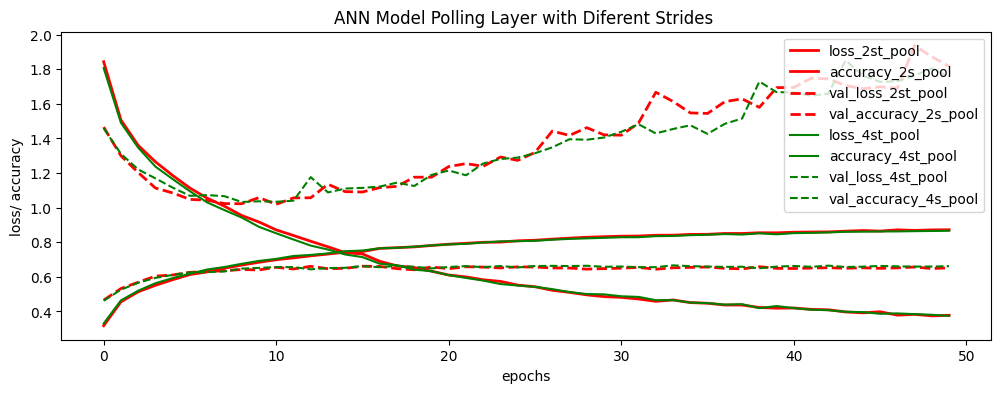

In [ ]:
#compare 2 stride poolin / 4 stride pooling / no pooling layer model

pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_model_history.pkl"
#load the dictionary as a pickle file
with open(pickle_path, 'rb') as file:
    history_2s_pool = pickle.load(file)


pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_strid4_model_history.pkl"
#load the dictionary as a pickle file
with open(pickle_path, 'rb') as file:
    history_4s_pool = pickle.load(file)

#pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/conv2d_modelchekpoint_nopool.keras"
#load the dictionary as a pickle file
#with open(pickle_path, 'rb') as file:
#    history_no_pool = pickle.load(file)


plt.figure(figsize=(12,4))
plt.plot(history_2s_pool['loss'],label='loss_2st_pool',color='red',linewidth=2,)
plt.plot(history_2s_pool['accuracy'],label='accuracy_2s_pool',color='red',linewidth=2)
plt.plot(history_2s_pool['val_loss'],label='val_loss_2st_pool',color='red',linestyle='dashed',linewidth=2)
plt.plot(history_2s_pool['val_accuracy'],label='val_accuracy_2s_pool',color='red',linestyle='dashed',linewidth=2)

plt.plot(history_4s_pool['loss'],label='loss_4st_pool',color='green')#, marker='o',markersize=4)
plt.plot(history_4s_pool['accuracy'],label='accuracy_4st_pool',color='green')#, marker='o',markersize=4)
plt.plot(history_4s_pool['val_loss'],label='val_loss_4st_pool',color='green',linestyle='dashed')#, marker='o',markersize=4)
plt.plot(history_4s_pool['val_accuracy'],label='val_accuracy_4s_pool',color='green',linestyle='dashed')#, marker='o',markersize=4)

#plt.plot(history_no_pool['loss'],label='loss_no_pool',color='dark_purple')
#plt.plot(history_no_pool['accuracy'],label='accuracy_no_pool',color='pink')


plt.title('ANN Model Polling Layer with Diferent Strides ')
plt.xlabel('epochs')
plt.ylabel('loss/ accuracy')
plt.legend()

# Transfer Learning

## xception model

In [ ]:
# prepare data

# Load CIFAR-10 dataset / resize data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_test_resized = tf.image.resize(x_test[:100,], [299, 299]) / 255.0
y_test_flatten = y_test[:100,].flatten()
x_test_resized_pre = keras.applications.xception.preprocess_input(x_test_resized)

# Load the model
xception_model =keras.applications.Xception(weights='imagenet', include_top=True, input_shape=(299, 299, 3))
for layer in xception_model.layers:
  layer.trainable =False

predictions = xception_model.predict(x_test_resized_pre)
decoded_predictions = keras.applications.xception.decode_predictions(predictions,top=2)

# Print out the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Image {i}: {pred}")

#compile & evaluate model
xception_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#xception_model.evaluate(x_test_1,y_test_flatten)

# Evaluate the model
try:
    evaluation = xception_model.evaluate(x_test_resized_pre, y_test_flatten)
    print(f"Evaluation Results (loss, accuracy): {evaluation}")
except ValueError as e:
    print(f"Error during evaluation: {e}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 11s/step
Image 0: [('n03729826', 'matchstick', 0.09937913), ('n01930112', 'nematode', 0.07011647)]
Image 1: [('n03729826', 'matchstick', 0.09703501), ('n01930112', 'nematode', 0.069742985)]
Image 2: [('n03729826', 'matchstick', 0.09688065), ('n01930112', 'nematode', 0.068614334)]
Image 3: [('n03729826', 'matchstick', 0.09549586), ('n01930112', 'nematode', 0.06840527)]
Image 4: [('n03729826', 'matchstick', 0.097734034), ('n01930112', 'nematode', 0.06892488)]
Image 5: [('n03729826', 'matchstick', 0.098074295), ('n01930112', 'nematode', 0.068833984)]
Image 6: [('n03729826', 'matchstick', 0.09680349), ('n01930112', 'nematode', 0.06964515)]
Image 7: [('n03729826', 'matchstick', 0.09708503), ('n01930112', 'nematode', 0.06814937)]
Image 8: [('n03729826', 'matchstick', 0.09809687), ('n01930112', 'nematode', 0.069312505)]
Image 9: [('n03729826', 'matchstick', 0.09772137), ('n01930112', 'nematode', 0.06985986)]
Image 10: [('n03729826', 'matchstick', 0.09743161), ('n0

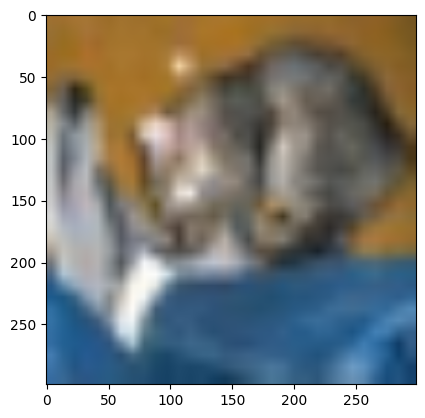

In [ ]:
plt.imshow(x_test[0,])

## xception model transfer

In [3]:
# create xception_transfer_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load model and create last layers
xception_model_base = Xception(weights='imagenet', include_top=False, input_shape=(72, 72, 3))

for layer in xception_model_base.layers:
    layer.trainable = False

global_layer = GlobalAveragePooling2D()(xception_model_base.output)
output = Dense(10, activation='softmax')(global_layer)
xception_transfer_model = keras.Model(inputs=xception_model_base.input, outputs=output)

# Compile the model
xception_transfer_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# prepare data

import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Resize and normalize training data
x_train = tf.image.resize(x_train[:5000,], [72, 72]) / 255.0  # Resize to [72, 72]
y_train = y_train.flatten()[:5000,]  # Flatten y_train to shape (n_samples,)
x_test = tf.image.resize(x_test[:1000,], [72, 72]) / 255.0
y_test = y_test[:1000,].flatten()

#x_train = keras.applications.xception.preprocess_input(x_train)
#x_test = keras.applications.xception.preprocess_input(x_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train.shape , x_test.shape

(TensorShape([5000, 72, 72, 3]), TensorShape([1000, 72, 72, 3]))

In [ ]:
# fit the model _new

import time
start_time= time.time()

checkpoint_path_3 = "/content/drive/MyDrive/Dl_chp4_pro2/xception_transfer_model_1.keras"

xception_transfer_model_callbacks_1= [ #keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5, restore_best_weights= True  ) ,
                 keras.callbacks.ModelCheckpoint(checkpoint_path_3,  monitor='accuracy', verbose = 0, mode ='auto', save_freq = 'epoch',
                                                 save_best_only = True )]

history_xception_transfer_model_1 = xception_transfer_model.fit(x_train,y_train, epochs=50,validation_split=0.15,callbacks=[xception_transfer_model_callbacks_1])

# save history
import pickle
#  path for save the pickle file
pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/history_xception_transfer_1.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(history_xception_transfer_model_1.history, pickle_file)

end_time = time.time()
print(f"Total training time for 50 epochs :   {end_time - start_time:.2f}   seconds.",end='\n')
loss,accuracy = xception_transfer_model.evaluate(x_train,y_train)
print(f"accuracy for 50 epochs  is :   {accuracy}  . ",end='\n')

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 128s 924ms/step - accuracy: 0.4312 - loss: 1.6913 - val_accuracy: 0.6440 - val_loss: 1.1571
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 137s 888ms/step - accuracy: 0.6852 - loss: 0.9971 - val_accuracy: 0.6373 - val_loss: 1.1124
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 138s 862ms/step - accuracy: 0.7369 - loss: 0.8405 - val_accuracy: 0.6520 - val_loss: 1.0816
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 141s 857ms/step - accuracy: 0.7700 - loss: 0.7393 - val_accuracy: 0.6667 - val_loss: 1.0314
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 146s 891ms/step - accuracy: 0.8027 - loss: 0.6870 - val_accuracy: 0.6640 - val_loss: 1.0551
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 141s 882ms/step - accuracy: 0.8222 - loss: 0.6023 - val_accuracy: 0.6573 - val_loss: 1.0544
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 147s 923ms/step - accuracy: 0.8394 - loss: 0.5599 - val_accuracy: 0.6560 - val_loss: 1.0457
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 136s 877ms/step - accuracy: 0.8629 -

In [ ]:
# keras.applications.xception.decode_predictions(predictions)       this function only work if training fit on ImageNet data set

In [5]:
# load best model
checkpoint_path_3 = "/content/drive/MyDrive/Dl_chp4_pro2/xception_transfer_model_1.keras"
xception_transfer_model = keras.models.load_model(checkpoint_path_3)

In [7]:
xception_transfer_model.evaluate(x_train,y_train)
xception_transfer_model.evaluate(x_test,y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 135s 860ms/step - accuracy: 0.9856 - loss: 0.0985
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 874ms/step - accuracy: 0.6203 - loss: 1.9969


[1.9016672372817993, 0.6190000176429749]

#Predictions and Class Names Of The Test Set

In [8]:
# prediction and have the class name with manually code

# Predict on the test set
predictions = xception_transfer_model.predict(x_test)

# CIFAR-10 class names
class_names = [
    'Airplane',
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]


# Print predicted class names and probabilities for each test image
for i in range(len(predictions)):
    predicted_class_index = np.argmax(predictions[i])  # Get index of highest probability
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predictions[i][predicted_class_index]

    print(f'Image {i+1}: Predicted Class: {predicted_class_name}, Probability: {predicted_probability:.2f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 853ms/step
Image 1: Predicted Class: Cat, Probability: 0.53
Image 2: Predicted Class: Ship, Probability: 1.00
Image 3: Predicted Class: Ship, Probability: 1.00
Image 4: Predicted Class: Ship, Probability: 0.99
Image 5: Predicted Class: Frog, Probability: 0.99
Image 6: Predicted Class: Dog, Probability: 0.65
Image 7: Predicted Class: Automobile, Probability: 0.99
Image 8: Predicted Class: Frog, Probability: 0.96
Image 9: Predicted Class: Dog, Probability: 1.00
Image 10: Predicted Class: Automobile, Probability: 0.91
Image 11: Predicted Class: Airplane, Probability: 1.00
Image 12: Predicted Class: Truck, Probability: 1.00
Image 13: Predicted Class: Frog, Probability: 0.92
Image 14: Predicted Class: Horse, Probability: 0.58
Image 15: Predicted Class: Truck, Probability: 1.00
Image 16: Predicted Class: Ship, Probability: 0.96
Image 17: Predicted Class: Ship, Probability: 0.58
Image 18: Predicted Class: Horse, Probability: 1.00
Image 19: Predicted Class: Ship,

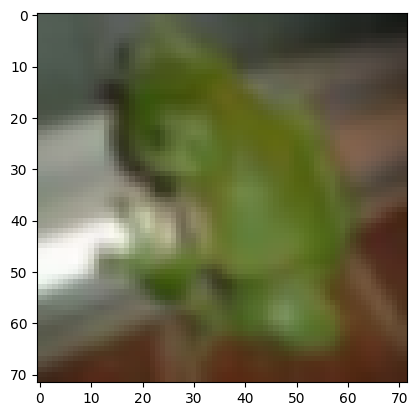

In [17]:
plt.imshow(x_test[7,])

## graph

In [30]:
# load  xception_model_transfer training history

import pickle
#  path of history file
pickle_path = "/content/drive/MyDrive/Dl_chp4_pro2/history_xception_transfer_1.pkl"
# Save the dictionary as a pickle file
with open(pickle_path, 'rb') as file:
   history_xception_transfer= pickle.load(file)

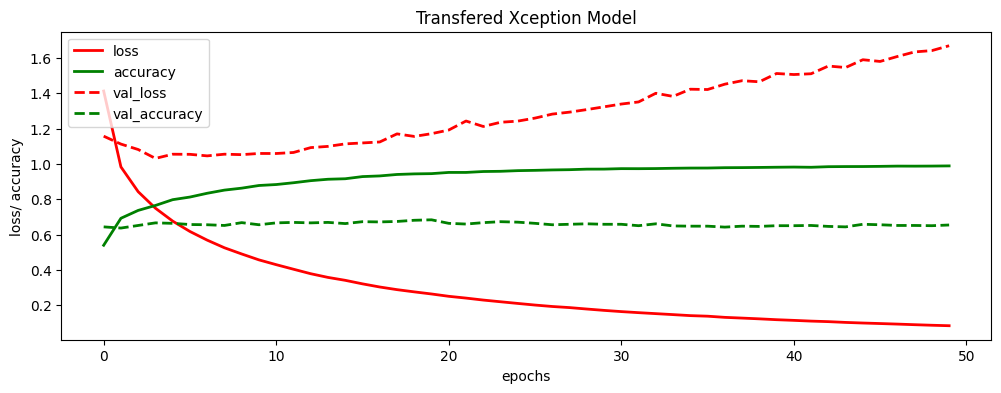

In [35]:
# draw the graph

plt.figure(figsize=(12,4))
plt.plot(history_xception_transfer['loss'],label='loss',color='red',linewidth=2,)
plt.plot(history_xception_transfer['accuracy'],label='accuracy',color='green',linewidth=2)
plt.plot(history_xception_transfer['val_loss'],label='val_loss',color='red',linestyle='dashed',linewidth=2)
plt.plot(history_xception_transfer['val_accuracy'],label='val_accuracy',color='green',linestyle='dashed',linewidth=2)


plt.title('Transfered Xception Model')
plt.xlabel('epochs')
plt.ylabel('loss/ accuracy')
plt.legend()

## xception model , use large data in baches

In [ ]:
# prepare data

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Resize and normalize training data
x_train = tf.image.resize(x_train[:5000,], [299, 299]) / 255.0  # Resize to [72, 72]
y_train = y_train.flatten()[:5000,]  # Flatten y_train to shape (n_samples,)
x_test = tf.image.resize(x_test[:1000,], [299, 299]) / 255.0
y_test = y_test[:1000,].flatten()

In [ ]:
# xception input shape : [none, 299, 299,3]
# my colab session is crashed because of insuficiant RAM so resize in baches and save in colab disk
# Create a directory to save resized images

import numpy as np
import tensorflow as tf
import os

output_dir = 'resized_images'
os.makedirs(output_dir, exist_ok=True)

batch_size = 16
for i in range(0, x_test.shape[0], batch_size):
    x_test_batch = x_test[i:i + batch_size]
    x_test_resized_batch = tf.image.resize(x_test_batch, [299, 299])

    # Convert to uint8
    x_test_resized_batch = tf.clip_by_value(x_test_resized_batch, 0, 255)
    x_test_resized_batch = tf.cast(x_test_resized_batch, tf.uint8)

    # Save the resized images to disk
    for j in range(x_test_resized_batch.shape[0]):
        tf.keras.preprocessing.image.save_img(os.path.join(output_dir, f'image_{i+j}.png'), x_test_resized_batch[j])

    print(f'Processed batch {i // batch_size + 1}')

Processed batch 1
Processed batch 2
Processed batch 3
Processed batch 4
Processed batch 5
Processed batch 6
Processed batch 7
Processed batch 8
Processed batch 9
Processed batch 10
Processed batch 11
Processed batch 12
Processed batch 13
Processed batch 14
Processed batch 15
Processed batch 16
Processed batch 17
Processed batch 18
Processed batch 19
Processed batch 20
Processed batch 21
Processed batch 22
Processed batch 23
Processed batch 24
Processed batch 25
Processed batch 26
Processed batch 27
Processed batch 28
Processed batch 29
Processed batch 30
Processed batch 31
Processed batch 32
Processed batch 33
Processed batch 34
Processed batch 35
Processed batch 36
Processed batch 37
Processed batch 38
Processed batch 39
Processed batch 40
Processed batch 41
Processed batch 42
Processed batch 43
Processed batch 44
Processed batch 45
Processed batch 46
Processed batch 47
Processed batch 48
Processed batch 49
Processed batch 50
Processed batch 51
Processed batch 52
Processed batch 53
Pr

In [ ]:
#colab RAM insufficiant save image in disk, and lode in baches

import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input, Xception

# Define your data directory
image_folder = 'resized_images'

# Function to load and preprocess images in batches
def load_images_in_batches(folder, batch_size=3):
    image_filenames = [f for f in os.listdir(folder) if f.endswith('.png')]

    for i in range(0,int(len(image_filenames)), batch_size):
        batch_filenames = image_filenames[i:i + batch_size]
        image_list = []

        for filename in batch_filenames:
            img_path = os.path.join(folder, filename)
            img = load_img(img_path)  # No need to resize again
            img_array = img_to_array(img)
            image_list.append(img_array)

        yield preprocess_input(np.array(image_list))  # Preprocess and yield the batch


In [ ]:

# Load the model
xception_model = Xception(weights='imagenet', include_top=True, input_shape=(299, 299, 3))

# Make predictions
predictions = []

# Process images in batches
for batch in load_images_in_batches(image_folder, batch_size=3):
     batch_predictions = xception_model.predict(batch)
     predictions.append(batch_predictions)

# Concatenate all predictions into one array
predictions = np.concatenate(predictions, axis=0)

# Print the shape of the predictions
print(predictions.shape)
keras.applications.xception.decode_predictions(predictions,top=1)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 

[[('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.08778051)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n04456115', 'torch', 0.072994016)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.09653572)],
 [('n03729826', 'matchstick', 0.0965